<a href="https://colab.research.google.com/github/Sejal-N/Employee_Attrition_Analysis_Analysis_using_PowerBI/blob/main/Project_Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Analysis

Project Title: Employee Attrition

Technologies: Analysis Data Science

Domain: Human Resource

In [1]:
#importing various packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('/content/Project 8_Attrition data.csv')

In [3]:
#Shape of data
df.shape

(4410, 29)

In [4]:
#checking the data
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
df.tail()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3
4409,4410,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,Male,...,NaN,6,21,3,9,1.0,3.0,NaN,4,3


In [6]:
#Columns name of dataset
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [7]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [9]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [10]:
#filing Null Columns with Mean
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean())

df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mean())

df['JobSatisfaction'] = df['JobSatisfaction'].fillna(df['JobSatisfaction'].mean())

df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mean())

In [11]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

#Exploratory Data Visualization

In [12]:
attrition_rate = df['Attrition'].value_counts(normalize=True)['Yes']* 100
print(f"The Overall Attritiion Rate in the Company is {attrition_rate:.2f}%")

The Overall Attritiion Rate in the Company is 16.12%


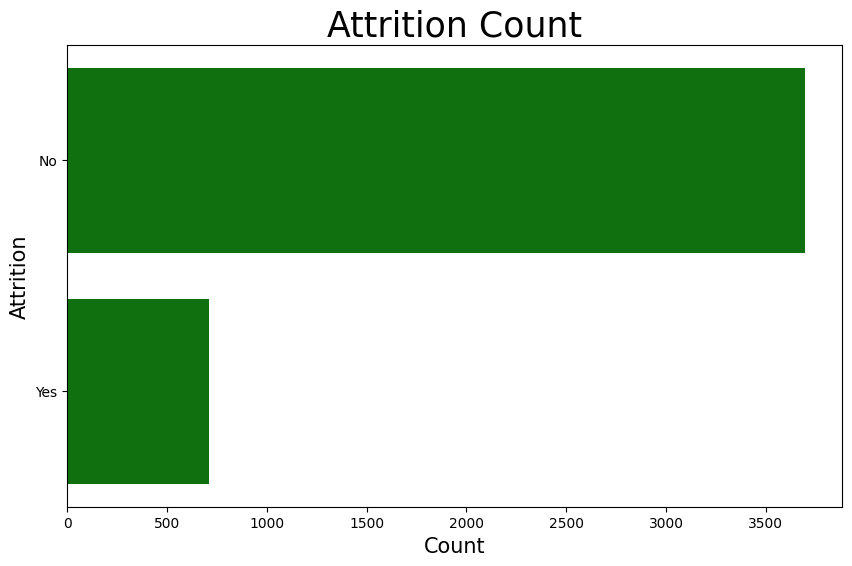

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(y='Attrition',data=df, color= 'g')
plt.title('Attrition Count',fontsize=25)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.show()

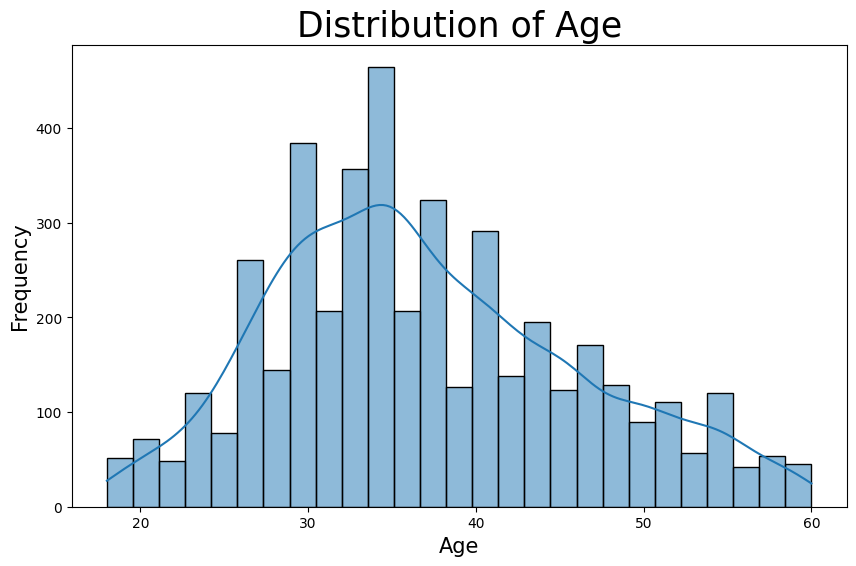

In [14]:
#disttribution of age
plt.figure(figsize = (10,6))
sns.histplot(data=df, x= 'Age', kde= True)
plt.title('Distribution of Age', fontsize= 25)
plt.xlabel('Age', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

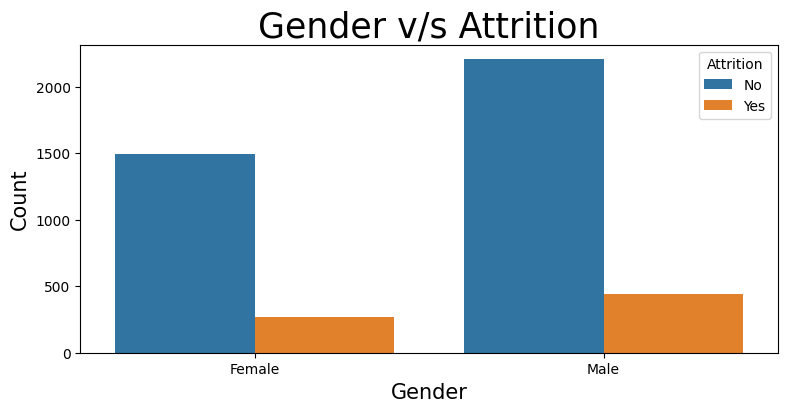

In [15]:
plt.figure(figsize = (9,4))
sns.countplot(x ='Gender', hue= 'Attrition', data=df)
plt.title("Gender v/s Attrition",fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [16]:
#contingency table
pd.crosstab(df['Gender'], df['Attrition'])

Attrition,No,Yes
Gender,,
Female,1494,270
Male,2205,441


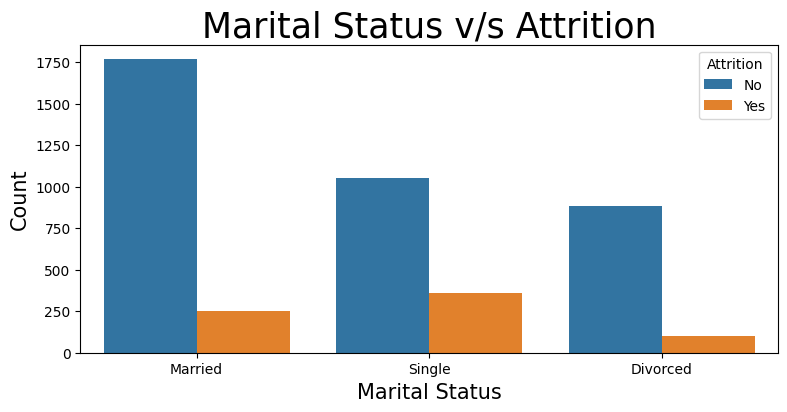

In [17]:
plt.figure(figsize = (9,4))
sns.countplot(x ='MaritalStatus', hue= 'Attrition', data=df)
plt.title("Marital Status v/s Attrition",fontsize=25)
plt.xlabel('Marital Status',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

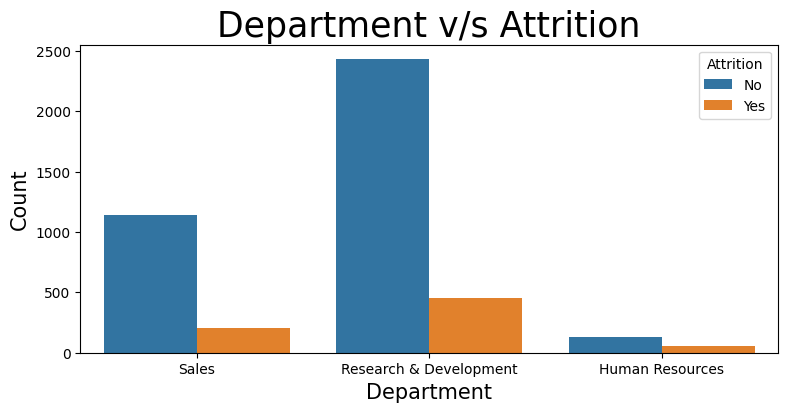

In [18]:
plt.figure(figsize = (9,4))
sns.countplot(x ='Department', hue= 'Attrition', data=df)
plt.title("Department v/s Attrition",fontsize=25)
plt.xlabel('Department',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

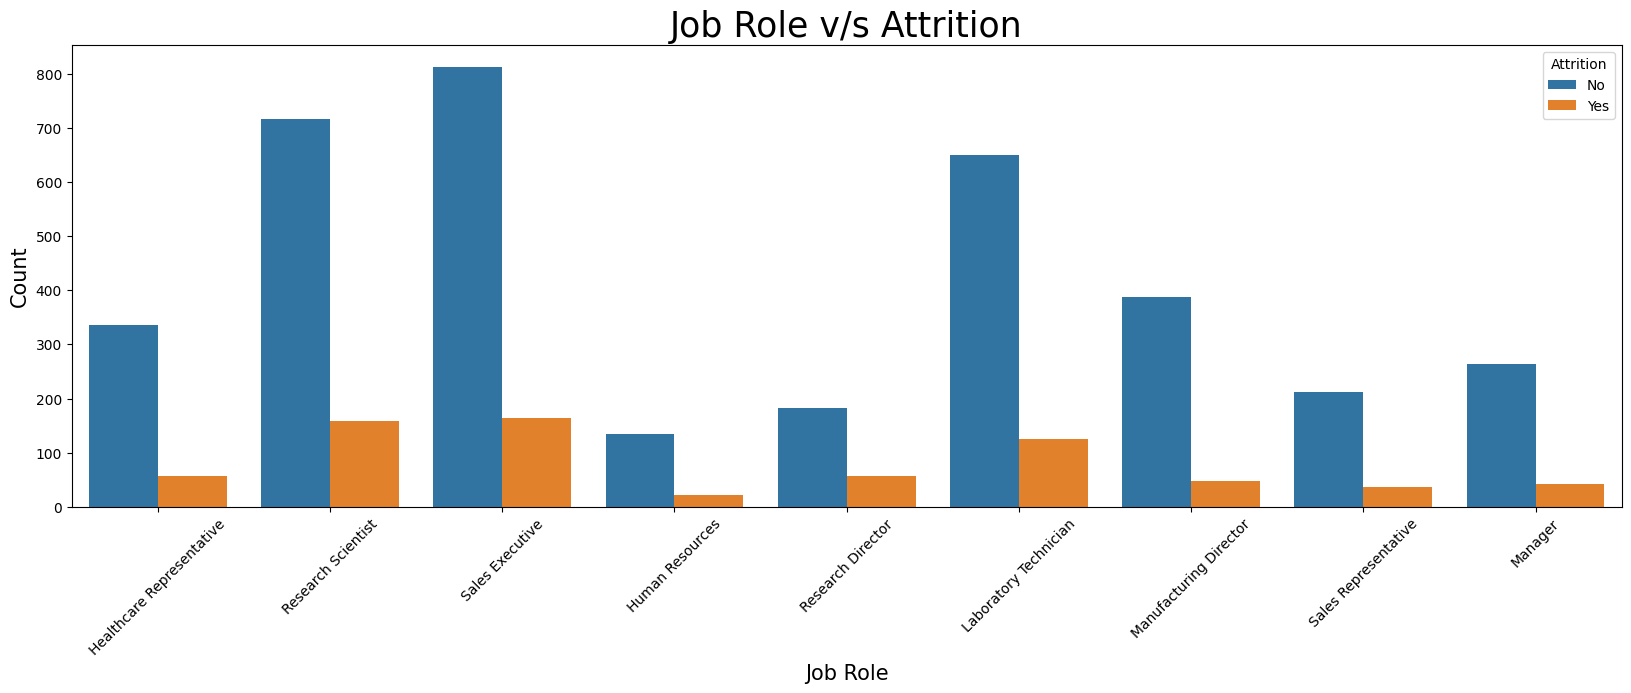

In [19]:
plt.figure(figsize = (20,6))
sns.countplot(x ='JobRole', hue= 'Attrition', data=df)
plt.title("Job Role v/s Attrition",fontsize=25)
plt.xlabel('Job Role',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

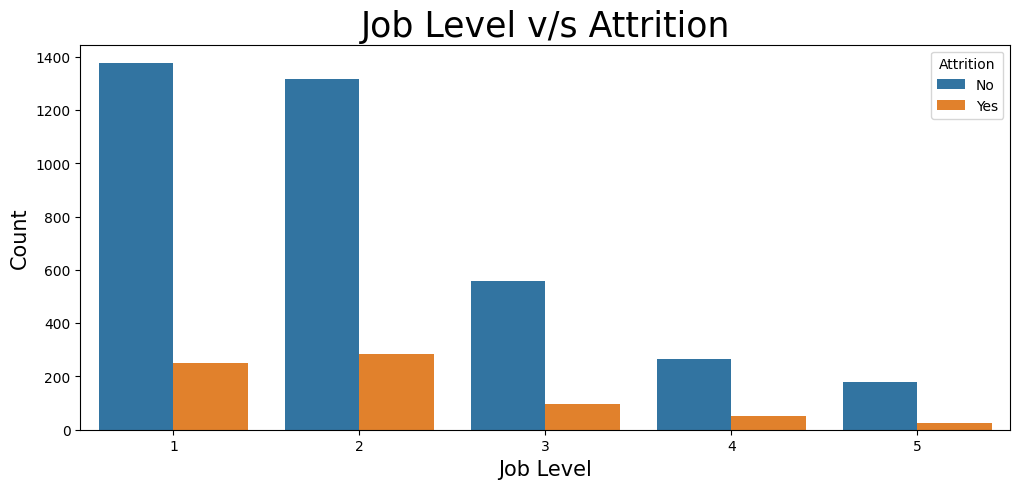

In [20]:
plt.figure(figsize = (12,5))
sns.countplot(x ='JobLevel',hue= 'Attrition', data=df)
plt.title("Job Level v/s Attrition",fontsize=25)
plt.xlabel('Job Level',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

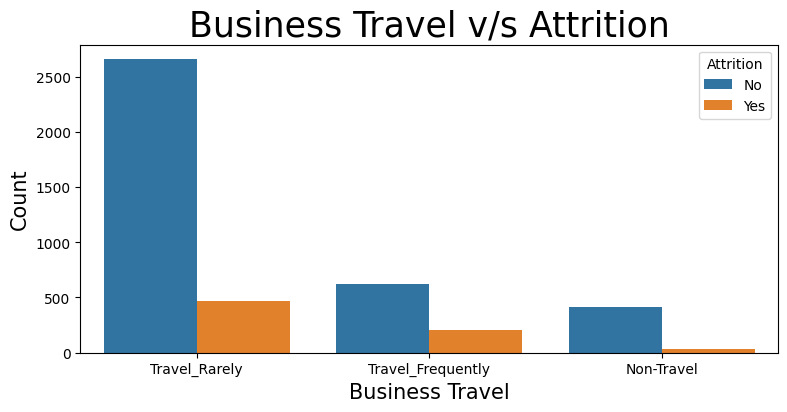

In [21]:
plt.figure(figsize = (9,4))
sns.countplot(x ='BusinessTravel',hue= 'Attrition', data=df)
plt.title("Business Travel v/s Attrition",fontsize=25)
plt.xlabel('Business Travel',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

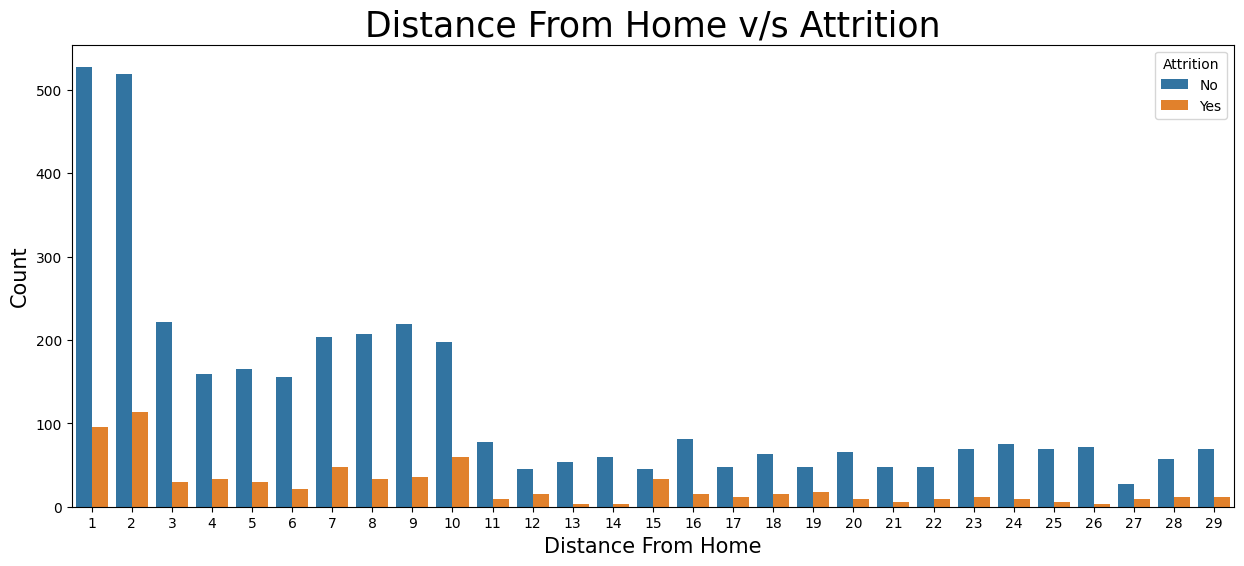

In [22]:
plt.figure(figsize = (15,6))
sns.countplot(x ='DistanceFromHome',hue= 'Attrition', data=df)
plt.title("Distance From Home v/s Attrition",fontsize=25)
plt.xlabel('Distance From Home',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

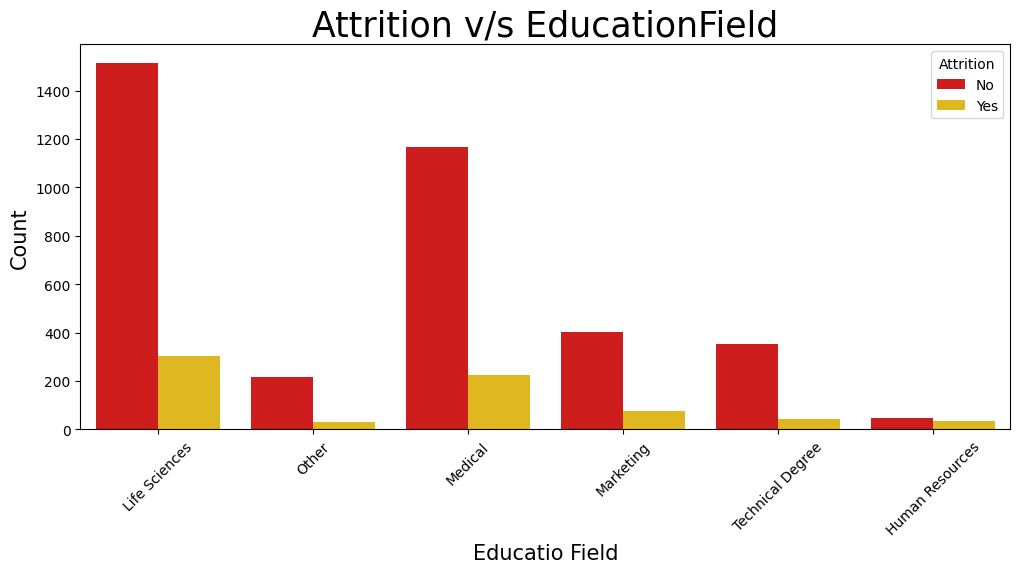

In [23]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition',data=df, palette='hot')
plt.title("Attrition v/s EducationField",fontsize=25)
plt.xlabel('Educatio Field',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

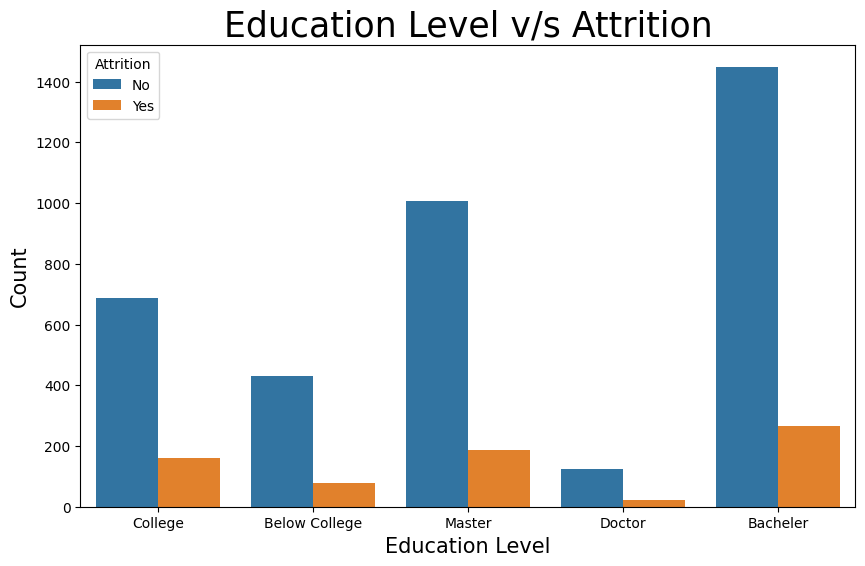

In [24]:
plt.figure(figsize = (10,6))
edu_map={1:'Below College',2:'College',3:'Bacheler',4:'Master',5:'Doctor'}
sns.countplot(x=df['Education'].map(edu_map),hue='Attrition',data=df)
plt.title("Education Level v/s Attrition",fontsize=25)
plt.xlabel('Education Level',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

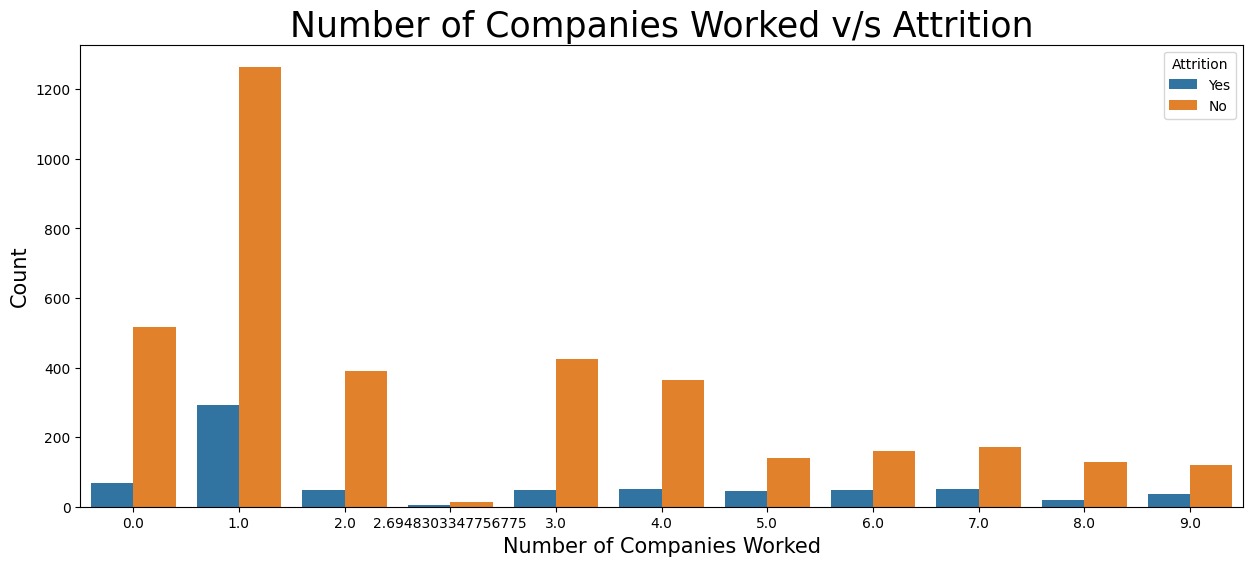

In [25]:
plt.figure(figsize = (15,6))
sns.countplot(x ='NumCompaniesWorked', hue= 'Attrition', data=df)
plt.title("Number of Companies Worked v/s Attrition",fontsize=25)
plt.xlabel('Number of Companies Worked',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

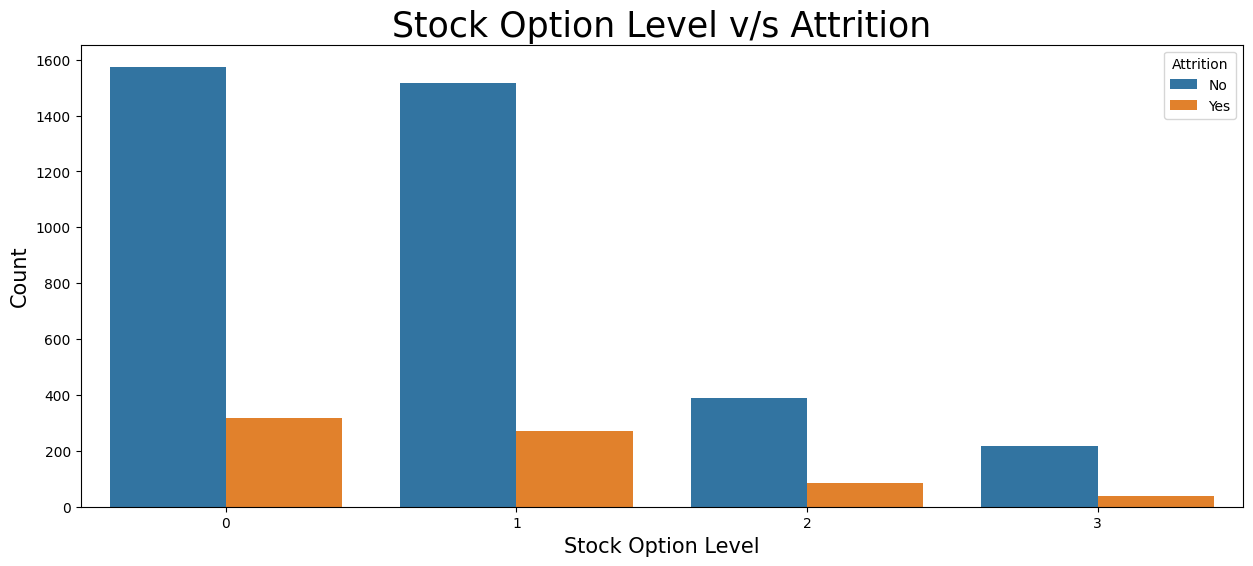

In [26]:
plt.figure(figsize = (15,6))
sns.countplot(x ='StockOptionLevel', hue= 'Attrition', data=df)
plt.title("Stock Option Level v/s Attrition",fontsize=25)
plt.xlabel('Stock Option Level',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

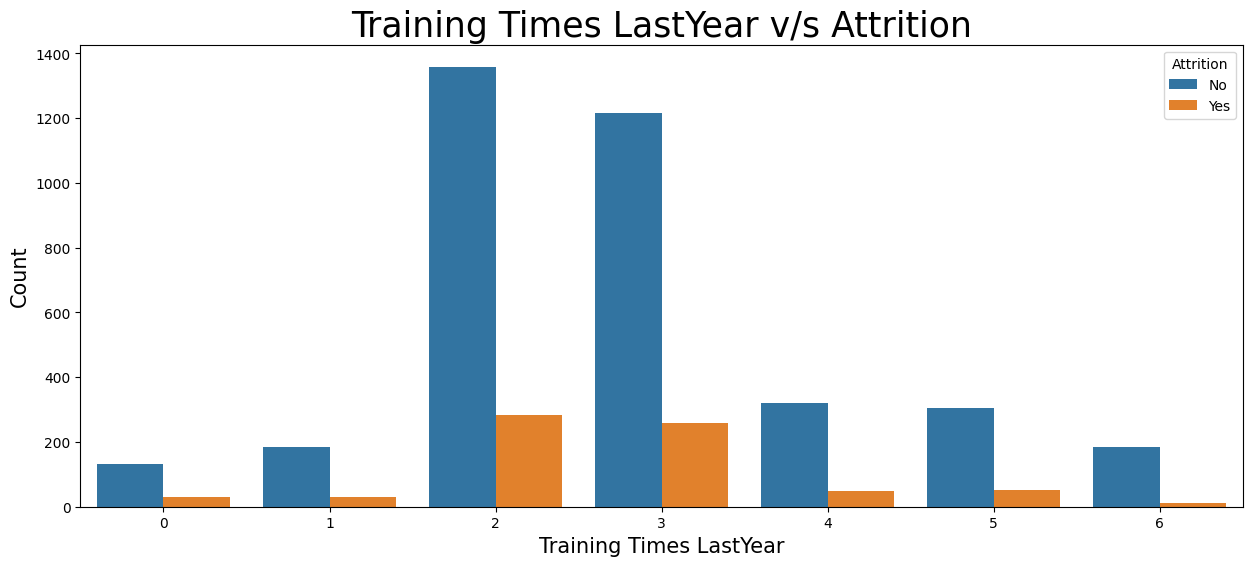

In [27]:
plt.figure(figsize = (15,6))
sns.countplot(x ='TrainingTimesLastYear', hue= 'Attrition', data=df)
plt.title("Training Times LastYear v/s Attrition",fontsize=25)
plt.xlabel('Training Times LastYear',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

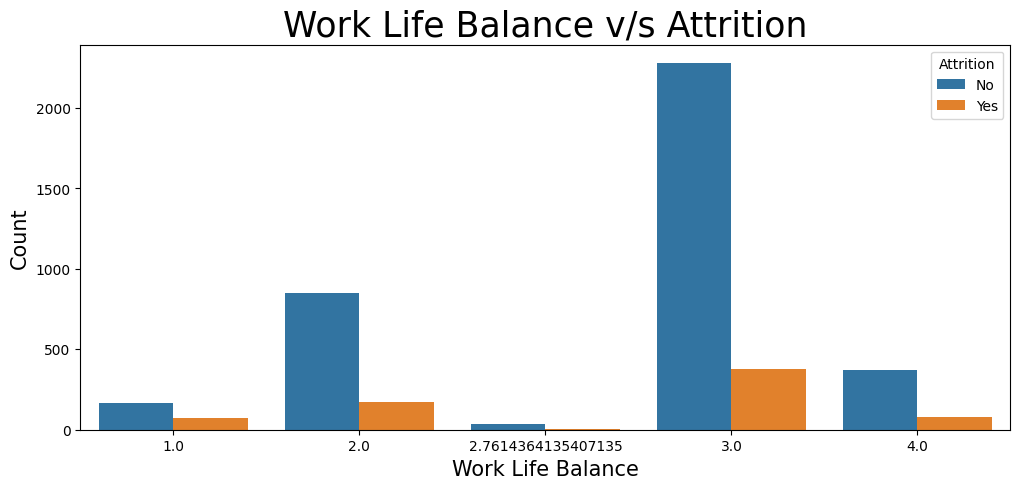

In [28]:
plt.figure(figsize = (12,5))
sns.countplot(x ='WorkLifeBalance', hue= 'Attrition', data=df)
plt.title("Work Life Balance v/s Attrition",fontsize=25)
plt.xlabel('Work Life Balance',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

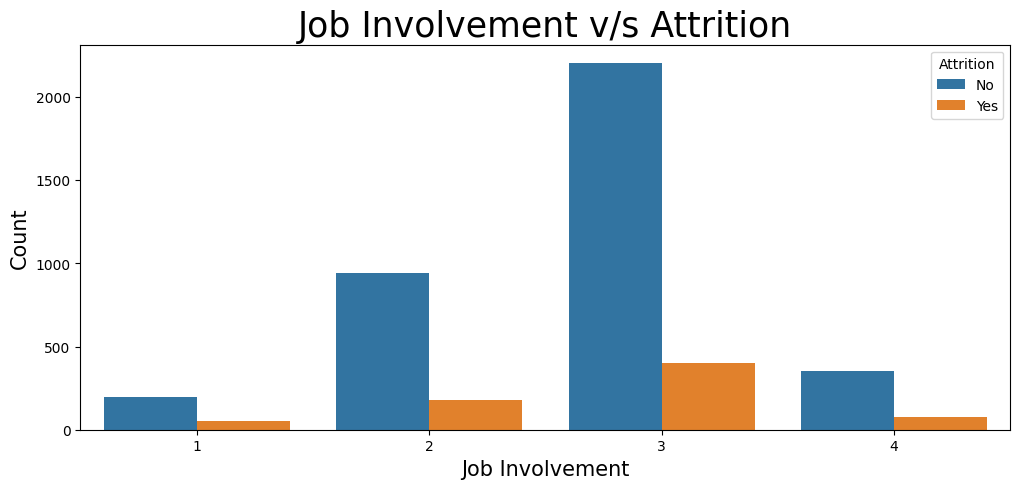

In [29]:
plt.figure(figsize = (12,5))
sns.countplot(x ='JobInvolvement', hue= 'Attrition', data=df)
plt.title("Job Involvement v/s Attrition",fontsize=25)
plt.xlabel('Job Involvement',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

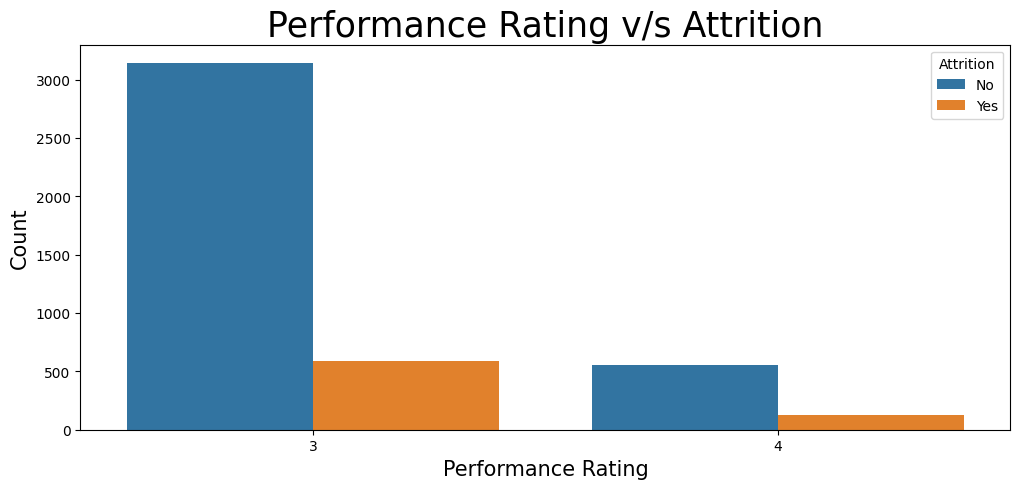

In [30]:
plt.figure(figsize = (12,5))
sns.countplot(x ='PerformanceRating', hue= 'Attrition', data=df)
plt.title("Performance Rating v/s Attrition",fontsize=25)
plt.xlabel('Performance Rating',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

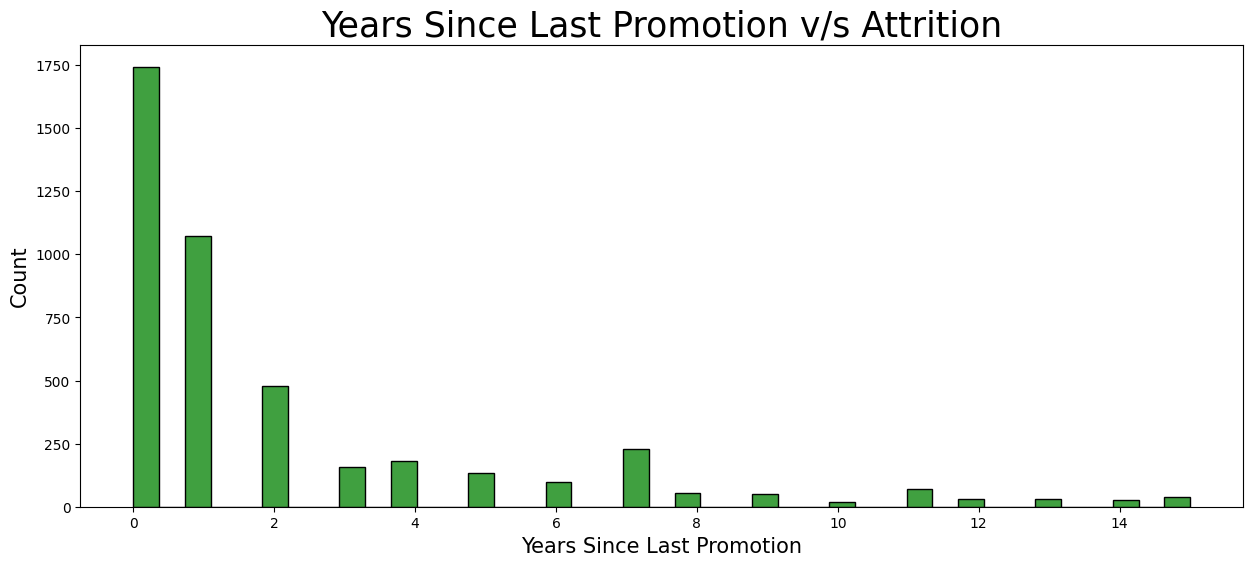

In [31]:
plt.figure(figsize = (15,6))

sns.histplot(data= df ,x = 'YearsSinceLastPromotion', color = 'Green')

plt.title("Years Since Last Promotion v/s Attrition", fontsize=25)
plt.xlabel('Years Since Last Promotion', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

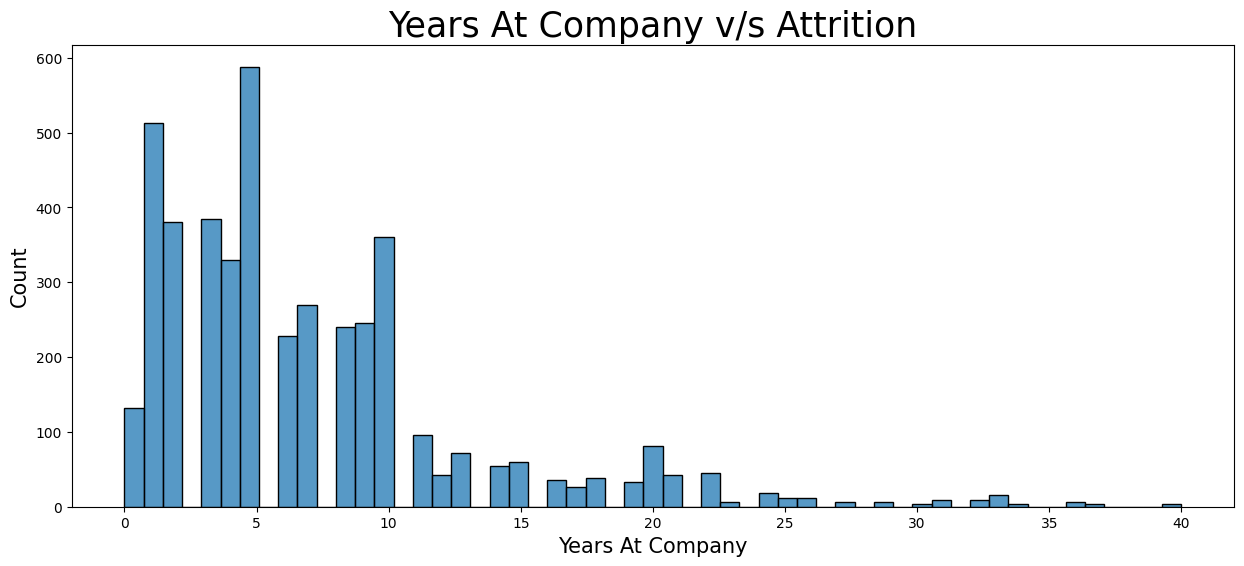

In [32]:
plt.figure(figsize = (15,6))
sns.histplot(data= df ,x = 'YearsAtCompany')
plt.title("Years At Company v/s Attrition", fontsize=25)
plt.xlabel('Years At Company', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

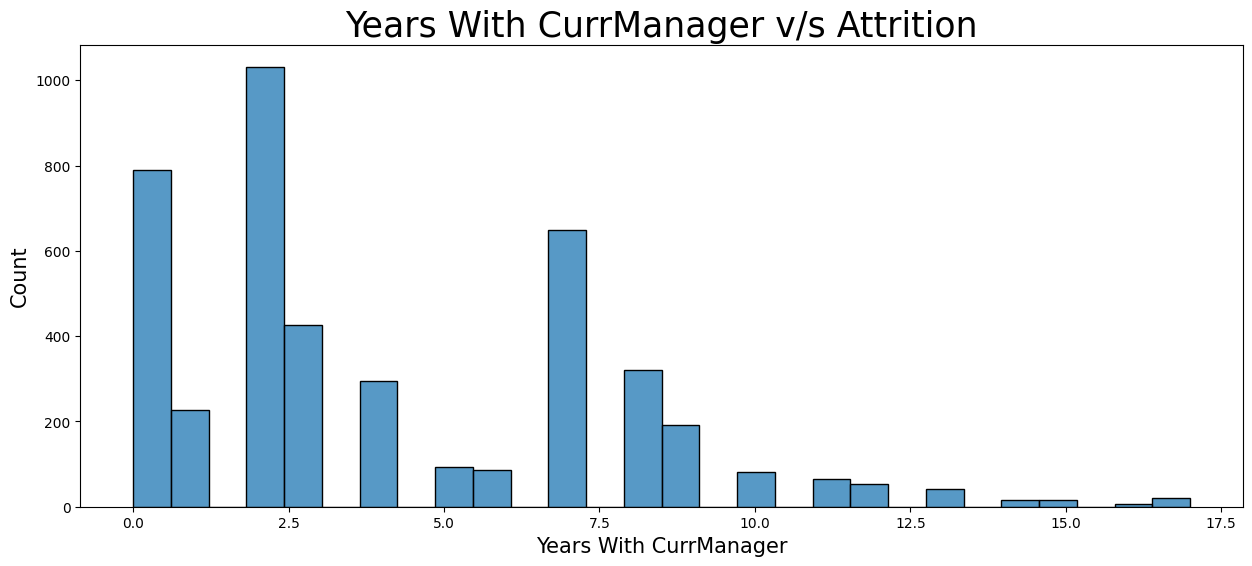

In [33]:


plt.figure(figsize = (15,6))
sns.histplot(data= df ,x = 'YearsWithCurrManager')
plt.title("Years With CurrManager v/s Attrition", fontsize=25)
plt.xlabel('Years With CurrManager', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [34]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

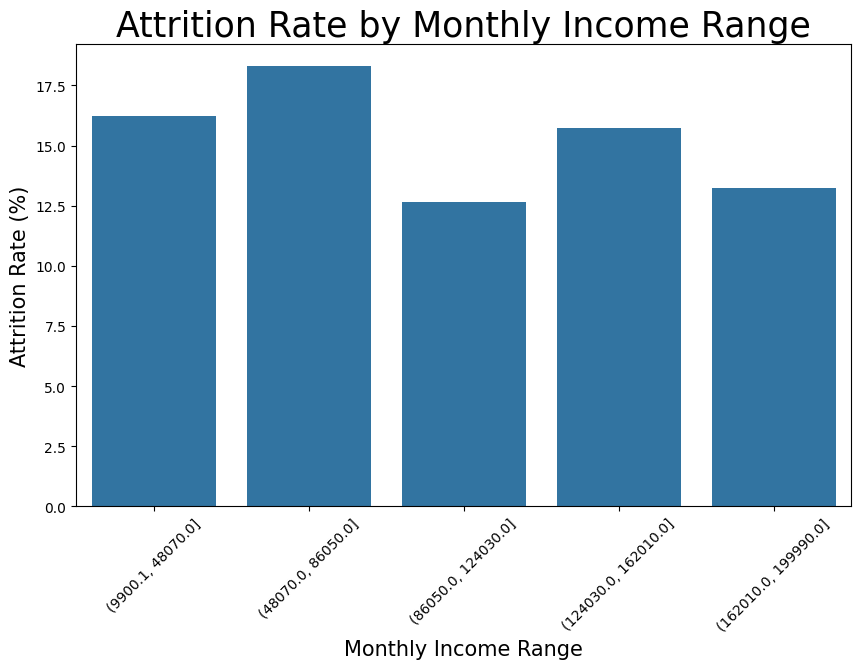

In [35]:
attrition_rates = df.groupby(pd.cut(df['MonthlyIncome'], bins=5))['Attrition'].mean() * 100
# Visualize the attrition rates by monthly income
plt.figure(figsize = (10,6))
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Monthly Income Range', fontsize=15)
plt.ylabel('Attrition Rate (%)', fontsize=15)
plt.title('Attrition Rate by Monthly Income Range', fontsize=25)
plt.xticks(rotation=45)
plt.show()

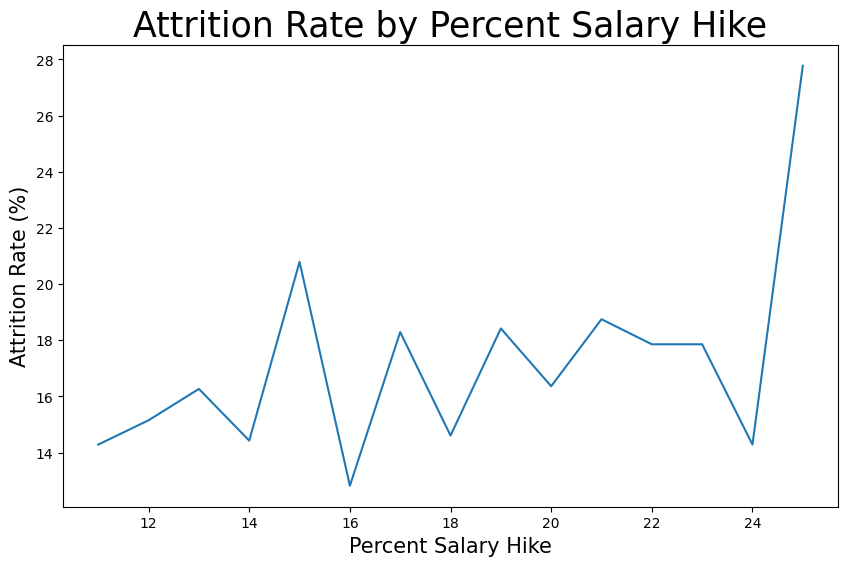

In [36]:
attrition_rates = df.groupby('PercentSalaryHike')['Attrition'].mean() * 100
plt.figure(figsize = (10,6))
sns.lineplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Percent Salary Hike', fontsize=15)
plt.ylabel('Attrition Rate (%)', fontsize=15)
plt.title('Attrition Rate by Percent Salary Hike', fontsize=25)
plt.show()


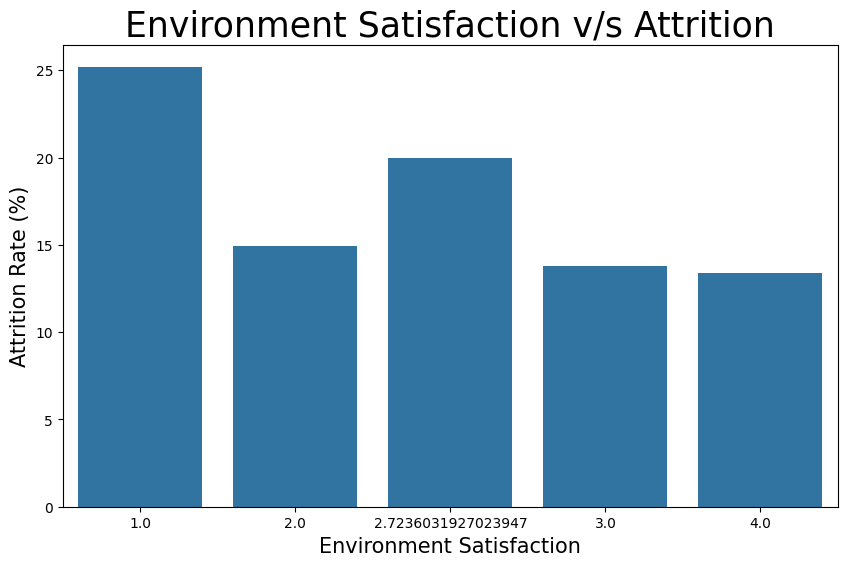

In [37]:
#vusualize attrition rates by job satisfaction
attrition_rates = df.groupby('EnvironmentSatisfaction')['Attrition'].mean() * 100
plt.figure(figsize = (10,6))
sns.barplot(x=attrition_rates.index,y=attrition_rates.values)
plt.xlabel('Environment Satisfaction',fontsize = 15)
plt.ylabel('Attrition Rate (%)',fontsize = 15)
plt.title('Environment Satisfaction v/s Attrition',fontsize = 25)
plt.show()

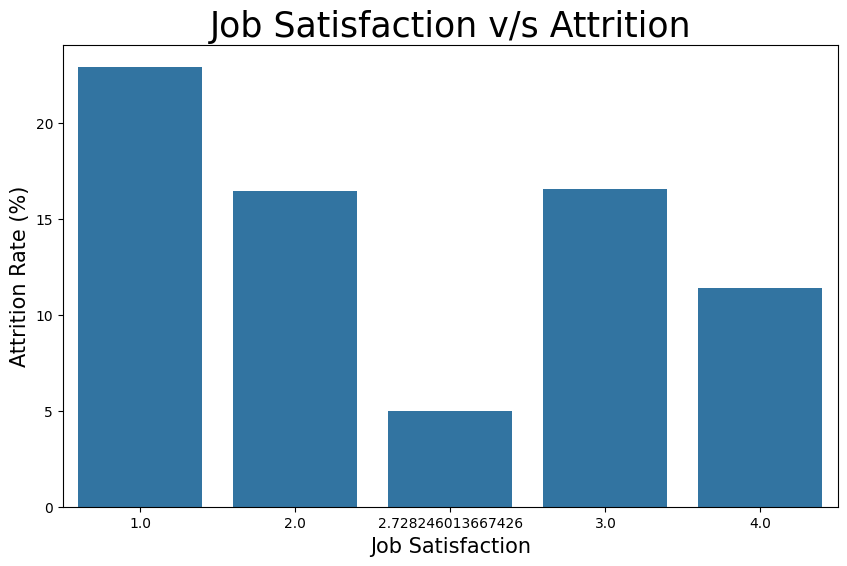

In [38]:
#vusualize attrition rates by job satisfaction
attrition_rates = df.groupby('JobSatisfaction')['Attrition'].mean() * 100
plt.figure(figsize = (10,6))
sns.barplot(x=attrition_rates.index,y=attrition_rates.values)
plt.xlabel('Job Satisfaction',fontsize = 15)
plt.ylabel('Attrition Rate (%)',fontsize = 15)
plt.title('Job Satisfaction v/s Attrition',fontsize = 25)
plt.show()

### END OF PROJECT